# Aim

Test the hypothesis that if we had a better model of what a PSD looked like, we'd have usable results when we inverted it.

In [1]:
import numpy as np
from scipy import signal, stats, optimize
from matplotlib import pyplot as plt
%matplotlib inline

a = 1e-6
fc = 0.1
N = 250
f_sampling = 8.6
lim = 1000

x_file = './roboao_tt/lx_all_library.txt'
x_tt = np.genfromtxt(x_file).flatten()[:lim] * 0.0175797 * 2
fxx, Pxx = signal.periodogram(x_tt, fs=f_sampling)

(1e-07, 10566.507846834853)

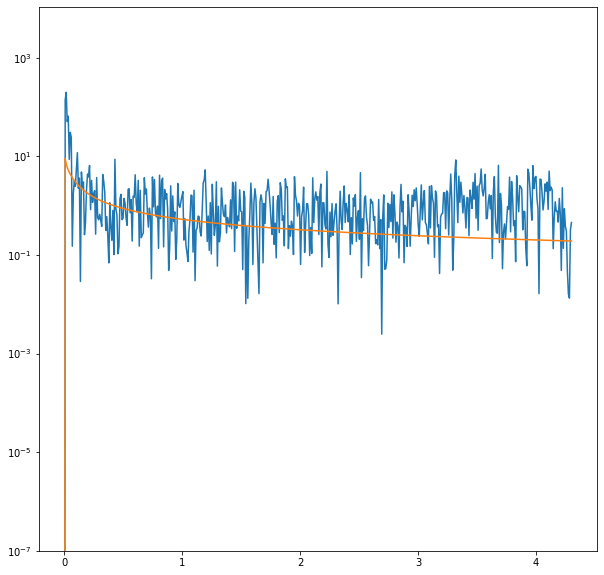

In [2]:
# first: the current model of a PSD
# I'm going to plot each of these on top of the PSD of the Robo-AO data

f = np.linspace(0, f_sampling/2, 501)
s = 1j*f
xF = np.real(1/((s+a)**(1/3)*(s+fc)**(1/3)))
xF[0] = Pxx[0]

plt.figure(figsize=(10,10))
plt.semilogy(fxx, Pxx * xF[10]/Pxx[10], label='Truth')
plt.semilogy(f, xF, label='Model')
plt.ylim(1e-7)

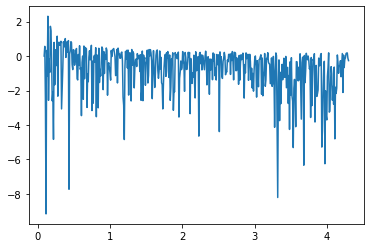

In [4]:
# seems pretty decent, but lots of information is getting lost. 
# It looks sort of sinusoidal - let's try and fit one to it!

residual = xF - Pxx * xF[10]/Pxx[10]
plt.plot(fxx[10:], residual[10:])

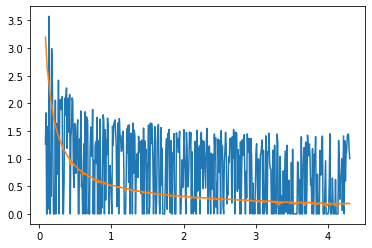

In [19]:
# the good thing about Robo-AO is there's no chance of vibration peaks: it's too slow
# the bad thing is you don't see the spectral component of measurement noise

plt.plot(fxx[10:], residual[10:])
x_tt_noisy = x_tt + np.random.normal(0, 0.04, size=(x_tt.size,))
plt.plot(fxx[10:], (xF - signal.periodogram(x_tt_noisy, fs=f_sampling)[1])[10:])
# so, looks like sufficiently small measurement noise doesn't show up on the spectrum anyway.
# if you switch xF - ... to Pxx - ... you'll get all zeros